<a href="https://colab.research.google.com/github/Anivrit/Metropolis/blob/master/multimet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
W_1 Changed
853
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999667, shape=(), dtype=float32)
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999666, shape=(), dtype=float32)
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999666, shape=(), dtype=float32)
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999666, shape=(), dtype=float32)
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999666, shape=(), dtype=float32)
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999666, shape=(), dtype=float32)
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999666, shape=(), dtype=float32)
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999666, shape=(), dtype=float32)
tf.Tensor(0.09999667, shape=(), dtype=float32)
W_2 Changed
tf.Tensor(0.09999666, shap

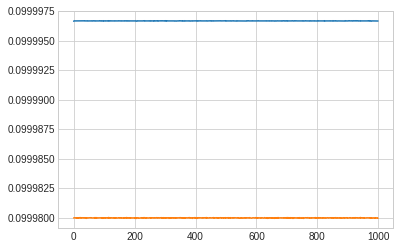

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random
import matplotlib.pyplot as plt
import gzip
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
plt.style.use('seaborn-whitegrid')

#ISSUE WITH COMPUTATION OF NEURAL NET LOSS EXAMINE THAT
#OUTPUTTING SAME VALUES CONSISTENTLY
def loadY(fnlabel):
	f = gzip.open(fnlabel, 'rb')
	f.read(8)
	return np.frombuffer(f.read(), dtype = np.uint8)

def loadX(fnimg):
	f = gzip.open(fnimg, 'rb')
	f.read(16)
	return np.frombuffer(f.read(), dtype = np.uint8).reshape((-1, 28*28))


trainX = loadX("/content/drive/My Drive/Code/Metropolis/train-images-idx3-ubyte.gz")
trainY = loadY("/content/drive/My Drive/Code/Metropolis/train-labels-idx1-ubyte.gz")
testX = loadX("/content/drive/My Drive/Code/Metropolis/t10k-images-idx3-ubyte.gz")
testY = loadY("/content/drive/My Drive/Code/Metropolis/t10k-labels-idx1-ubyte.gz")
data = {"trainX": trainX, "trainY": trainY, "testX": testX, "testY": testY}

def process(data):
    transposed = np.transpose(data)
    return (transposed.astype('double')/256)

train_x = process(data["trainX"])
test_x = process(data["testX"])
train_y_one_hot = np.zeros((10,60000))
for i in range(60000):
    for j in range(10):
        train_y_one_hot[j][i] = (data["trainY"][i]==j)
test_y_one_hot = np.zeros((10,10000))
for k in range(10000):
    for l in range(10):
        test_y_one_hot[l][k] = (data["testY"][k]==l)


input_dim= tf.constant(784)
hidden= tf.constant(100)
global M_1
M_1 = tf.eye(hidden,num_columns = input_dim)
global M_2
M_2 = tf.eye(10,num_columns = hidden)
T = tf.constant(1000)
T_2= tf.constant(10) #inner level running time
s_prop_1= tf.constant(0.001) #Variance of proposal distribution q_1
s_prop_2= tf.constant(0.0005) #Variance of proposal distribution q_2

#Temperature vector:
a_1= tf.constant(2*10**(-6))
a_2= tf.constant(10**(-6))

Hist_train = tf.Variable(tf.zeros(T,tf.float32)) #Training errors
Hist_test = tf.Variable(tf.zeros(T,tf.float32)) #Testing errors

#initialization
W_1 = tf.Variable(tf.zeros((hidden,input_dim), dtype=tf.float32))
W_2 = tf.Variable(tf.zeros((10,hidden),dtype = tf.float32))

def loss(w1,w2):
    global M_1
    global M_2
    lost=tf.math.exp(-neural_net_loss(train_x, train_y_one_hot,w1+M_1,w2+M_2));
    return lost


def neural_net_loss(input_instance, input_label,V_1,V_2):
    product = tf.matmul(V_1,input_instance)
    x_1 = tf.keras.activations.relu( product, alpha=0.0, max_value=None, threshold=0)
    x_2 = tf.matmul(V_2,x_1)
    Net_output = tf.keras.activations.softmax(x_2, axis=-1)
    mse = tf.keras.losses.MeanSquaredError()
    loss_amount = mse(input_label,Net_output)
    print(loss_amount)
    return loss_amount
denom = (loss(W_1,W_2)**(1/a_2))
for t in range(T):
    print(t)
    num_A=0
    W_1_hat = tf.random.normal([hidden,input_dim],0,s_prop_1,tf.float32)
    for u in range(T_2):
        W_2_hat = tf.random.normal([10,hidden],0,s_prop_2)
        b = tf.divide((loss(W_1,W_2_hat)),denom)
        v = random.random()
        if(v<b):
            W_2 = W_2_hat
            print("W_2 Changed")
        num_A=num_A+ tf.divide((loss(W_1_hat,W_2)),denom)
    norm_W_1 = tf.norm(W_1)
    norm_W_2 = tf.norm(W_2)
    train_error=neural_net_loss(train_x, train_y_one_hot,W_1+M_1,W_2+M_2)
    test_error=neural_net_loss(test_x, test_y_one_hot,W_1+M_1,W_2+M_2)
    Hist_train = Hist_train[t].assign(train_error)
    Hist_test = Hist_test[t].assign(test_error)
    A = tf.divide(num_A,tf.cast(T_2,tf.float32))
    C=tf.pow(A,(tf.divide(a_2,(a_1+a_2))))
    w = random.random()
    if(w<C):
        W_1=W_1_hat
        print('W_1 Changed')

#Next Step is to Plot data

plt.plot(tf.range(0,T).numpy(),Hist_train.numpy())
plt.plot(tf.range(0,T).numpy(),Hist_test.numpy())
plt.show()